In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [54]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
sample, sample_label = x_train[0], y_train[0]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [55]:
batch_size = 64
input_dim = 28
units = 64
output_size = 10  # labels are from 0 to 9

# Build the RNN model
def build_model():
    lstm_layer = tf.keras.layers.RNN(tf.keras.layers.LSTMCell(units), input_shape=(None, input_dim))
    model = tf.keras.models.Sequential([ lstm_layer, \
        tf.keras.layers.BatchNormalization(), tf.keras.layers.Dense(output_size)])
    return model

In [56]:
model = build_model()
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                   optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rnn_4 (RNN)                  (None, 64)                23808     
_________________________________________________________________
batch_normalization_4 (Batch (None, 64)                256       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 24,714
Trainable params: 24,586
Non-trainable params: 128
_________________________________________________________________


In [57]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, \
                    epochs=5) # We only train for one epoch because it's slower.

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 12s 199us/sample - loss: 0.3682 - accuracy: 0.8852 - val_loss: 0.1306 - val_accuracy: 0.9580
Epoch 2/5
60000/60000 [==============================] - 11s 178us/sample - loss: 0.1114 - accuracy: 0.9659 - val_loss: 0.1006 - val_accuracy: 0.9679
Epoch 3/5
60000/60000 [==============================] - 14s 237us/sample - loss: 0.0782 - accuracy: 0.9761 - val_loss: 0.0852 - val_accuracy: 0.9735
Epoch 4/5
60000/60000 [==============================] - 14s 228us/sample - loss: 0.0619 - accuracy: 0.9808 - val_loss: 0.0858 - val_accuracy: 0.9727
Epoch 5/5
60000/60000 [==============================] - 14s 228us/sample - loss: 0.0517 - accuracy: 0.9837 - val_loss: 0.1001 - val_accuracy: 0.9692


In [58]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

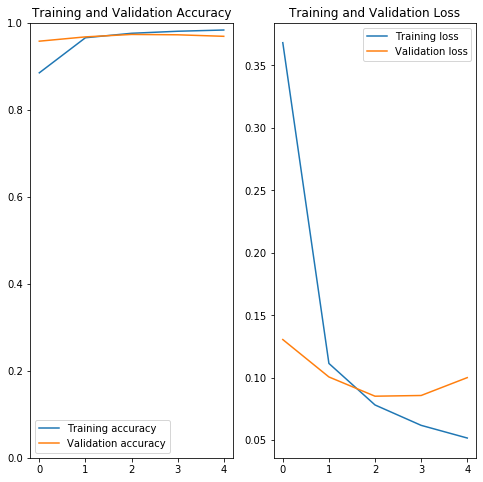

In [59]:
plt.figure(figsize=(8, 8))

plt.subplot(1,2,1)
plt.ylim(0,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.legend(labels=['Training accuracy', 'Validation accuracy'], loc='best')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.legend(labels=['Training loss', 'Validation loss'], loc='best')

plt.show()

In [60]:
model.save('RNN_model.h5')

In [61]:
tr, fa, lossL = 0, 0, []
for i in range(1000):
    pred = model.predict( np.array([x_test[i]]) )
    if np.argmax(pred)==y_test[i]:
        tr+=1
    else:
        fa+=1
        lossL.append((i, np.argmax(pred), y_test[i]))

print(tr, fa, 'acc={}'.format(tr/(tr+fa)))

969 31 acc=0.969


predict=6 true=5


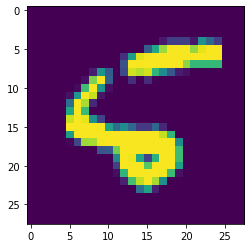

In [63]:
for wrong in lossL:
    print('predict={}'.format(wrong[1]), 'true={}'.format(wrong[2]))
    plt.imshow(x_test[wrong[0]])
    break